In [3]:
# %matplotlib inline
%time from hikyuu.interactive import *

2025-11-04 13:16:10,788 [INFO] runing in interactive session [<module>] (F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\__init__.py:131) [hikyuu::hku_info]
2025-11-04 13:16:10,788 [INFO] running in jupyter [<module>] (F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\__init__.py:138) [hikyuu::hku_info]


2025-11-04 13:16:10.798 [HKU-I] - Plugin path: F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\plugin (StockManager.cpp:113)
2025-11-04 13:16:11.002 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-11-04 13:16:11.005 [HKU-I] - 加载市场信息…… (StockManager.cpp:704)
2025-11-04 13:16:11.006 [HKU-I] - 加载证券类型信息…… (StockManager.cpp:722)
2025-11-04 13:16:11.006 [HKU-I] - 加载证券信息…… (StockManager.cpp:602)
2025-11-04 13:16:11.153 [HKU-I] - 加载权息数据…… (StockManager.cpp:740)
2025-11-04 13:16:11.355 [HKU-I] - 加载板块信息…… (StockManager.cpp:182)
2025-11-04 13:16:11.657 [HKU-I] - 加载K线数据…… (StockManager.cpp:186)
2025-11-04 13:16:11.658 [HKU-I] - 预加载 day K线数据至缓存 (最大数量: 100000)! (StockManager.cpp:231)
2025-11-04 13:16:11.658 [HKU-I] - 0.65 秒数据加载完毕. (StockManager.cpp:193)
CPU times: total: 3.67 s
Wall time: 3.69 s


In [2]:
help(create_figure)

Help on function create_figure in module hikyuu.draw.drawplot:

create_figure(n=1, figsize=None)
    生成含有指定坐标轴数量的窗口，最大只支持4个坐标轴。

    :param int n: 坐标轴数量
    :param figsize: (宽, 高)
    :return: (ax1, ax2, ...) 根据指定的坐标轴数量而定，超出[1,4]个坐标轴时，返回None



Indicator{
  name: KDATA
  size: 200
  discard: 0
  result sets: 6
  params: params[kdata(KData): SZ000510, kpart(string): KDATA, ]
  support indicator param: False
  formula: KDATA
  first: 2025-01-03 00:00:00
  last: 2025-11-03 00:00:00
  values0: [3.59, 3.45, 3.48, ..., 5.48, 5.57, 5.63]
  values1: [3.62, 3.48, 3.59, ..., 5.71, 5.69, 5.93]
  values2: [3.43, 3.26, 3.47, ..., 5.37, 5.54, 5.62]
  values3: [3.45, 3.46, 3.59, ..., 5.59, 5.6, 5.9]
  values4: [4718, 3959.1, 4291.8, ..., 22953.1, 17435.5, 31824.5]
  values5: [134823, 116400, 121631, ..., 412980, 309699, 547968]
}


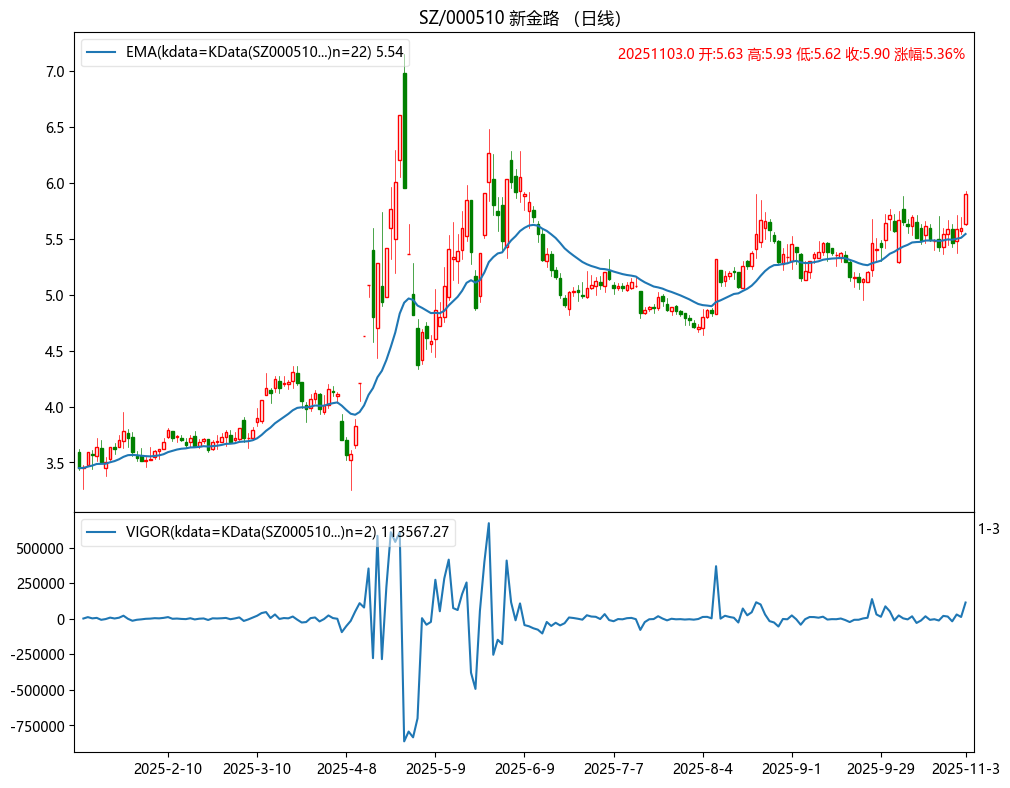

In [4]:
# s = sm['sh000001']
# s = sm['sz000001']
# s = sm['sh688004']
s = sm['sz000510']
# s = sm['sz300502']
k = s.get_kdata(Query(-200))

kind = KDATA(k)
print(kind)

#创建两个显示坐标轴的窗口
ax1,ax2 = create_figure(2)

#在第一个坐标轴中绘制K线和EMA
k.plot(axes=ax1)
ma = EMA(CLOSE(k))
ma.plot(axes=ax1, legend_on=True)

#在第二个坐标轴中绘制艾尔德力度指标
v = VIGOR(k)
v.plot(axes=ax2, legend_on=True)

In [25]:
# blockg
# blockstart

In [9]:
i = 0
#遍历所有股票
for s in sm:
    i += 1
    #print(s)
print("全部数量:", i)

len(sm)

全部数量: 7778


7778

In [38]:
blk = sm.get_block("指数板块", "")
print(len(blk))
for s in blk:
    if s.valid:
        print(s)

0


In [13]:
s = sm['sh688981']
# s = sm['sz300502']
q = Query(-200)
k = s.get_kdata(q)
# 通过q获取时间
calendar = sm.get_trading_calendar(q)
close = CLOSE(k)

# 对齐
print(calendar[0])
print(calendar[-1])



kind = KDATA(k)
df = kind.to_df()
print(df)
print(c)

2025-01-03 00:00:00
2025-11-03 00:00:00
      datetime  value0   value1   value2  value3     value4     value5
0   2024-12-25   96.48   99.800   96.380   97.99   967961.0   985329.0
1   2024-12-26   98.00   98.880   96.150   96.73   691460.6   711045.0
2   2024-12-27   96.78  102.370   96.490   97.51  1137894.4  1144716.0
3   2024-12-30   96.60  100.530   96.000   99.29   895049.4   906573.0
4   2024-12-31   99.00   99.580   94.590   94.62   844675.4   878238.0
..         ...     ...      ...      ...     ...        ...        ...
195 2025-10-28  133.00  135.800  132.000  132.69   929904.6   695189.0
196 2025-10-29  132.00  134.530  130.310  133.00   911143.7   688460.0
197 2025-10-30  133.00  133.000  128.509  128.55   901898.2   692864.0
198 2025-10-31  128.03  128.699  124.180  124.18   869209.9   691668.0
199 2025-11-03  122.00  122.600  117.550  120.21   894038.2   747709.0

[200 rows x 7 columns]
DatetimeList[2025-01-03 00:00:00, 2025-01-06 00:00:00, 2025-01-07 00:00:00, 2025-01-

In [9]:
print(len(blocka))
print(len(blocksh))
print(len(blocksz))
print(len(blockg))
print(len(blockstart))
print(len(blockbj))

print(len(blocksh) + len(blocksz) + len(blockg) + len(blockstart))

3464
1697
1486
1389
591
281
5163


In [12]:
# 扩展select函数
def my_select(cond, start=Datetime(202501010000), end=Datetime.now(), block_list=[], print_out=True):
    q = Query(start, end)
    d = sm.get_trading_calendar(q, 'SH')
    if len(d) == 0:
        return
        
    result = []
    for b in block_list:
        for s in b:
            if not s.valid:
                continue
    
            k = s.get_kdata(q)
            if len(k) == 0 or k[-1].datetime != d[-1]:
                continue
    
            cond.set_context(k)
            if len(cond) > 0 and not isnan(cond[-1]) and cond[-1] > 0:
                result.append(s)
                if print_out:
                    print(d[-1], s)

    return result